# Mini-project.3- 음원 분류를 위한 Recurrent Neural Network
목표: Recurrent Neural Network(RNN)을 이용하여 도시에서 발생하는 소리들을 구분하는 classifier를 만든다.

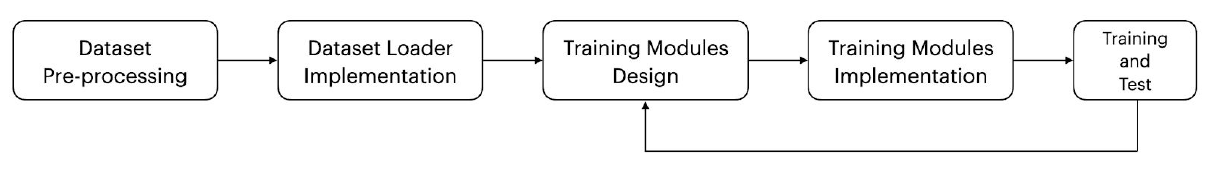

위와 같은 순서로 진행

아래 논문 참고하였다.

https://www.researchgate.net/publication/336071819_Urban_Sound_Classification_using_Long_Short-Term_Memory_Neural_Network

# 필요한 라이브러리 import

In [1]:
import os
# Pandas
import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

# Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, AveragePooling2D, LSTM
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import InputLayer
import tensorflow.keras.utils



# Audio
import librosa
import librosa.display

# Plot
import matplotlib.pyplot as plt
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import model_to_dot
import pydot
import graphviz
import seaborn as sns

# Utility
import glob
import numpy as np
from tqdm import tqdm
import IPython.display as ipd
from timeit import default_timer as timer

C:\Users\home\anaconda3\envs\NLP_env\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))  ### GPU 메모리 소모량 감소 OOM발생해서 처리

# data loader
데이터셋은 UrbanSound8K 이용할것이다. 총 class는 10개이다

In [3]:
for dirname, _, filenames in os.walk(r'C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K'): ##데이터 불러오기
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\UrbanSound8K.csv
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold1\101415-3-0-2.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold1\101415-3-0-3.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold1\101415-3-0-8.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold1\102106-3-0-0.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold1\102305-6-0-0.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold1\102842-3-0-1.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold1\102842-3-1-0.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold1\102842-3-1-5.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold1\102842-3-1-6.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold1\103074-7-0-0.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold1\103

C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold3\90846-8-0-0.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold3\9223-2-0-10.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold3\9223-2-0-15.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold3\9223-2-0-17.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold3\9223-2-0-2.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold3\9223-2-0-4.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold3\9223-2-0-5.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold3\9223-2-0-9.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold3\93065-9-0-12.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold3\93065-9-0-14.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold3\93065-9-0-17.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold3\93065-9-0

C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold7\101848-9-0-0.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold7\101848-9-0-1.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold7\101848-9-0-2.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold7\101848-9-0-3.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold7\101848-9-0-8.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold7\101848-9-0-9.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold7\102853-8-0-0.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold7\102853-8-0-1.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold7\102853-8-0-2.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold7\102853-8-0-3.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold7\102853-8-0-4.wav
C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fol

In [4]:
# upload the data
classes = pd.read_csv(r'C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\UrbanSound8K.csv')  ## 데이터 확인
classes[1225:1227]

,slice_file_name,fsID,start,end,salience,fold,classID,class
1225,128891-3-0-2.wav,128891,1.0,5.0,1,6,3,dog_bark
1226,128891-3-0-4.wav,128891,2.0,6.0,1,6,3,dog_bark


In [5]:
classes_code = {v:k for k,v in zip(classes["class"], classes["classID"])}  ## 데이터 라벨 확인
# A dictionnary doesn't accept double values
print(classes_code)

{3: 'dog_bark', 2: 'children_playing', 1: 'car_horn', 0: 'air_conditioner', 9: 'street_music', 6: 'gun_shot', 8: 'siren', 5: 'engine_idling', 7: 'jackhammer', 4: 'drilling'}


In [6]:
label = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark','drilling',
         'engine_idling','gun_shot','jackhammer','siren','street_music']  ## 데이터 라벨리스트 생성

# data labeling

In [7]:
# Building our dataset
dataset = list()
for folder in glob.glob(r'C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K/**'):
    list_sounds_path = glob.glob(folder+"//**")
    for elm in list_sounds_path:
        label = elm.split(".wav")[0][-5]
        if label == '-':
            label = elm.split(".wav")[0][-6]
        dataset.append({"file_name" : elm,
                       "label" : label})
        pass
    pass
pass
dataset = pd.DataFrame(dataset)
dataset = shuffle(dataset, random_state = 24)

In [8]:
dataset.head()

,file_name,label
2683,C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold3\13230-0-0-23.wav,0
8044,C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold9\12812-5-0-2.wav,5
8696,C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold9\81722-3-0-21.wav,3
6050,C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold6\54697-7-0-0.wav,7
5316,C:\Users\home\WorkSpace\bite_dgree_Deep_Learning\UrbanSound8K\fold5\72259-1-10-6.wav,1


1번과 6번의 데이터양이 적다. 어떤 결과가 나오는지 보자.

In [9]:
dataset['label'].value_counts()

0    1112
3    999 
4    999 
5    993 
7    989 
2    954 
9    942 
8    929 
1    442 
6    373 
Name: label, dtype: int64

# Data split    
train : validation : test = 6 : 2 : 2

In [10]:
train, test = train_test_split(dataset, test_size = 0.4, random_state = 24)

In [11]:
print(train.shape)
print(test.shape)

(5239, 2)
(3493, 2)


In [12]:
validation, test = train_test_split(test, test_size = 0.5, random_state = 24)

In [13]:
print(train.shape)
print(validation.shape)
print(test.shape)

(5239, 2)
(1746, 2)
(1747, 2)


# data feature extract

MFCC를 사용해서 train셋, validation셋, test셋 데이터의 feature을 추출한다.

In [14]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
    return mfccs

In [15]:
x_train = list()
y_train = list()
for i in tqdm(range(len(train))):
    x_train.append(extract_feature(train.file_name.iloc[i]))
    y_train.append(train.label.iloc[i])
    pass
pass

 22%|█████████████████▎                                                            | 1162/5239 [02:18<07:02,  9.64it/s]C:\Users\home\anaconda3\envs\NLP_env\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
 61%|███████████████████████████████████████████████▍                              | 3183/5239 [06:24<04:34,  7.48it/s]C:\Users\home\anaconda3\envs\NLP_env\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
 92%|███████████████████████████████████████████████████████████████████████▊      | 4821/5239 [09:45<01:01,  6.84it/s]C:\Users\home\anaconda3\envs\NLP_env\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
100%|██████████████████████████████████████████████████████████████████████████████| 5239/5239 [10:35<00:00,  8.24it/s

In [16]:
x_val = list()
y_val = list()
for i in tqdm(range(len(validation))):
    x_val.append(extract_feature(validation.file_name.iloc[i]))
    y_val.append(validation.label.iloc[i])
    pass
pass

100%|██████████████████████████████████████████████████████████████████████████████| 1746/1746 [03:32<00:00,  8.20it/s]


In [17]:
x_test = list()
y_test = list()
for i in tqdm(range(len(test))):
    x_test.append(extract_feature(test.file_name.iloc[i]))
    y_test.append(test.label.iloc[i])
    pass
pass

100%|██████████████████████████████████████████████████████████████████████████████| 1747/1747 [03:35<00:00,  8.11it/s]


# data structure

In [18]:
print("x_train",len(x_train),"y_train", len(y_train))
print("x_val",len(x_val),"y_val", len(y_val))
print("x_test",len(x_test),"y_test", len(y_test))

x_train 5239 y_train 5239
x_val 1746 y_val 1746
x_test 1747 y_test 1747


In [19]:
X_train, Y_train = list(), list()
for x,y in zip(x_train,y_train):
    if x.shape == (40, 173):
        X_train.append(x)
        Y_train.append(y)
        pass
    pass
pass
## shape 다른것들 제거

In [20]:
X_val, Y_val = list(), list()
for x,y in zip(x_val,y_val):
    if x.shape == (40, 173):
        X_val.append(x)
        Y_val.append(y)
        pass
    pass
pass
## shape 다른것들 제거

In [21]:
X_test, Y_test = list(), list()
for x,y in zip(x_test,y_test):
    if x.shape == (40, 173):
        X_test.append(x)
        Y_test.append(y)
        pass
    pass
pass
## shape 다른것들 제거

In [22]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_val = np.array(X_val)
Y_val = np.array(Y_val)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
# 데이터 구조 확인

(4397, 40, 173)
(1456, 40, 173)
(1474, 40, 173)


In [23]:
%%time
encoder = LabelEncoder()
encoder.fit(Y_train)

Y_train = encoder.transform(Y_train)
Y_val = encoder.transform(Y_val)
Y_test = encoder.transform(Y_test)

Wall time: 997 µs


In [24]:
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)
# # 라벨 카테고리형 변환

In [25]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4397, 40, 173)
(1456, 40, 173)
(1474, 40, 173)


In [26]:
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(4397, 10)
(1456, 10)
(1474, 10)


# model build

In [71]:
model = Sequential()

model.add(InputLayer(input_shape=(40, 173))) 
model.add(LSTM(128, input_shape=(40, 173, 1), return_sequences=False))
# model.add(LSTM(64, input_shape=(40, 173, 1), return_sequences=False, dropout=0.25))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               154624    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 155,914
Trainable params: 155,914
Non-trainable params: 0
_________________________________________________________________


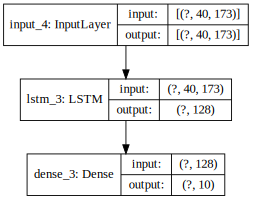

In [72]:
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

## optimizer and loss
참고한 논문에서 loss함수를 CategoricalCrossentropy를 사용하였고 optimizer는 adam을 사용하였다

SGD랑도 비교를 해보자

In [73]:
model.compile(loss=CategoricalCrossentropy(from_logits=False), metrics=['accuracy'], optimizer='adam') 

In [74]:
# model.compile(loss=CategoricalCrossentropy(from_logits=False), metrics=['accuracy'], optimizer='sgd')  

# model training

In [75]:
print("Fit model on training data")
history = model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=25,
    validation_data=(X_val, Y_val)
)

##참고한 논문에서 60Epochs를 사용하였다.

Fit model on training data
Train on 4397 samples, validate on 1456 samples
Epoch 1/25
4397/4397 [==============================] - 2s 408us/sample - loss: 2.0880 - accuracy: 0.2217 - val_loss: 1.9069 - val_accuracy: 0.2857
Epoch 2/25
4397/4397 [==============================] - 1s 190us/sample - loss: 1.5401 - accuracy: 0.4674 - val_loss: 1.7270 - val_accuracy: 0.3207
Epoch 3/25
4397/4397 [==============================] - 1s 191us/sample - loss: 1.1974 - accuracy: 0.6270 - val_loss: 1.6811 - val_accuracy: 0.3482
Epoch 4/25
4397/4397 [==============================] - 1s 186us/sample - loss: 0.9312 - accuracy: 0.7437 - val_loss: 1.6760 - val_accuracy: 0.3503
Epoch 5/25
4397/4397 [==============================] - 1s 189us/sample - loss: 0.7111 - accuracy: 0.8328 - val_loss: 1.6872 - val_accuracy: 0.3695
Epoch 6/25
4397/4397 [==============================] - 1s 191us/sample - loss: 0.5105 - accuracy: 0.9008 - val_loss: 1.7250 - val_accuracy: 0.3640
Epoch 7/25
4397/4397 [===============

# model visualizing

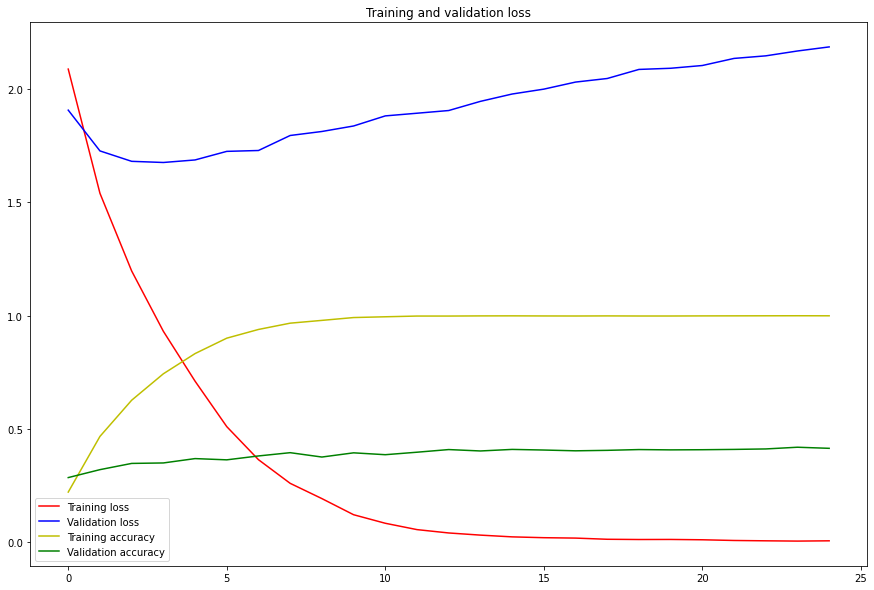

In [76]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(loss))
plt.figure(figsize=(15,10))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.plot(epochs, accuracy, 'y',label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g',label='Validation accuracy')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Test

In [77]:
print("Fit model on test data")
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print(test_acc)

Fit model on test data
1474/1474 [==============================] - 0s 94us/sample - loss: 2.2802 - accuracy: 0.4179
0.41791046


drop_out(0.25)사용시 

adam 20 epoch 시 accuracy 약 0.38의 결과를 얻을수 있었다.

adam 30 epoch 시 accuracy 약 0.37의 결과를 얻을수 있었다.

adam 60 epoch 시 accuracy 약 0.40 (가장 최적값)의 결과를 얻을수 있었다.

adam 90 epoch 시 accuracy 약 0.37의 결과를 얻을수 있었다.

sgd 20 epoch 시 accuracy 약 0.35 (가장 최적값)의 결과를 얻을수 있었다.

sgd 30 epoch 시 accuracy 약 0.33의 결과를 얻을수 있었다.

sgd 60 epoch 시 accuracy 약 0.33의 결과를 얻을수 있었다.

drop_out 미사용시 

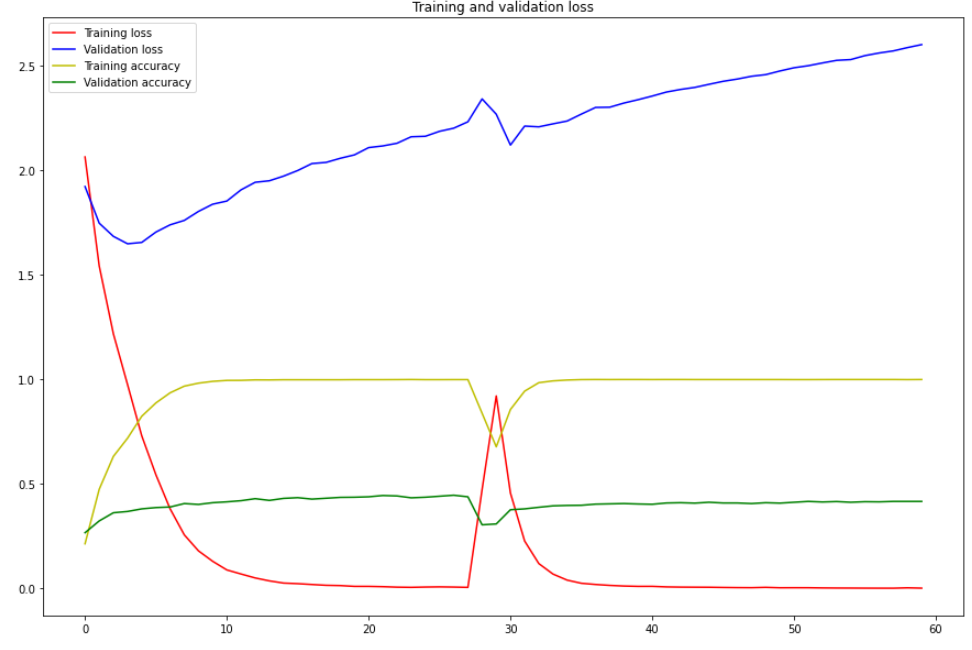

이런 결과가 나왔음으로 

adam 20 epoch 시 accuracy 약 0.41의 결과를 얻을수 있었다.

adam 25 epoch 시 accuracy 약 0.42의 (가장 최적값) 결과를 얻을수 있었다.

## confusion matrix 만들기 위한 준비

In [62]:
Y_pred = model.predict(X_test)
Y_pred

array([[1.9833747e-02, 2.8146705e-02, 2.2072400e-01, ..., 3.1938928e-03,
        1.4842764e-02, 3.4384501e-01],
       [2.1761462e-01, 1.3413446e-05, 1.1223922e-03, ..., 9.0041898e-02,
        1.3823559e-02, 8.8078323e-06],
       [6.8547294e-02, 1.4091203e-04, 2.8768351e-04, ..., 9.1991377e-01,
        3.4412282e-05, 3.2372279e-06],
       ...,
       [5.9333824e-02, 1.1560207e-02, 3.7978312e-01, ..., 1.7425237e-03,
        2.2812138e-01, 1.8459620e-01],
       [7.6164347e-03, 3.1993238e-07, 3.3783025e-04, ..., 2.2826926e-04,
        7.9259436e-05, 2.0193822e-07],
       [6.2859125e-02, 2.8717727e-03, 1.6546648e-03, ..., 7.7706106e-02,
        5.2034075e-04, 3.3820007e-02]], dtype=float32)

In [63]:
Y_pred

array([[1.9833747e-02, 2.8146705e-02, 2.2072400e-01, ..., 3.1938928e-03,
        1.4842764e-02, 3.4384501e-01],
       [2.1761462e-01, 1.3413446e-05, 1.1223922e-03, ..., 9.0041898e-02,
        1.3823559e-02, 8.8078323e-06],
       [6.8547294e-02, 1.4091203e-04, 2.8768351e-04, ..., 9.1991377e-01,
        3.4412282e-05, 3.2372279e-06],
       ...,
       [5.9333824e-02, 1.1560207e-02, 3.7978312e-01, ..., 1.7425237e-03,
        2.2812138e-01, 1.8459620e-01],
       [7.6164347e-03, 3.1993238e-07, 3.3783025e-04, ..., 2.2826926e-04,
        7.9259436e-05, 2.0193822e-07],
       [6.2859125e-02, 2.8717727e-03, 1.6546648e-03, ..., 7.7706106e-02,
        5.2034075e-04, 3.3820007e-02]], dtype=float32)

In [64]:
Y_pred[0]

array([0.01983375, 0.0281467 , 0.220724  , 0.34532338, 0.00978477,
       0.00344236, 0.01086337, 0.00319389, 0.01484276, 0.343845  ],
      dtype=float32)

In [65]:
Y_pred[0][0]

0.019833747

In [66]:
Y_predd = tf.argmax(Y_pred,1)   ## 1466의 feature로써 10개의 라벨 예측값 argmax로 예측된 최대 확률 인덱스 반환

In [67]:
Y_predd

<tf.Tensor: shape=(1474,), dtype=int64, numpy=array([3, 5, 7, ..., 2, 5, 4], dtype=int64)>

In [68]:
Y_testt= tf.argmax(Y_test,1)  ##10개의 라벨값 

In [69]:
Y_testt

<tf.Tensor: shape=(1474,), dtype=int64, numpy=array([3, 3, 4, ..., 8, 0, 9], dtype=int64)>

# confusion matrix

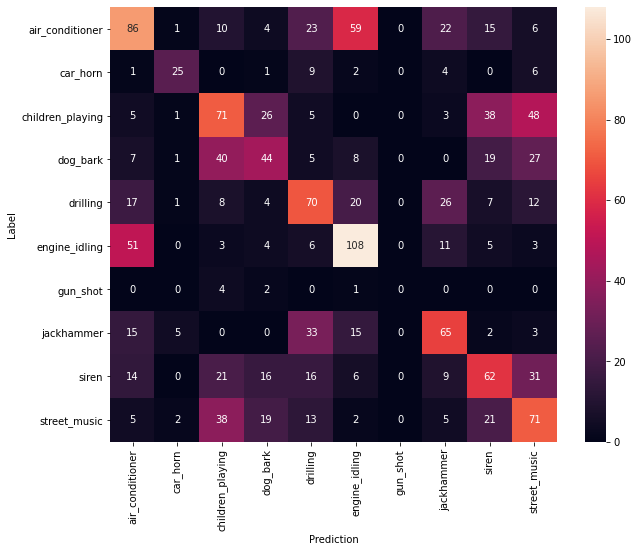

In [70]:
label = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music']
cm =tf.math.confusion_matrix(Y_testt, Y_predd, num_classes = 10)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, xticklabels=label, yticklabels=label, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

데이터양이 별로 없던 car_horn과 gun_shot은 확실히 정확히 예측한 값도 적고 오분류한 값도 매우 적다. 심지어 gun_shot은 알맞게 설정된것이 없다. 데이터셋을 만들때 random_state를 바꿔가면서 실행해 보았지만 부족한 데이터의 값이 더 늘지는 않았다. 많은 데이터의 필요성을 알게되었다.